# House Price Prediction Regration Project 

In [168]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import calendar
from pandas.api.types import CategoricalDtype 
from sklearn.preprocessing import StandardScaler 

# Load Data 

In [5]:
train_data_path=r"C:\House_price_prediction\data\train.csv"
test_data_path=r"C:\House_price_prediction\data\test.csv"

df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

print("shape of df_train:",df_train.shape)
print("shape of df_test:",df_test.shape)

shape of df_train: (1460, 81)
shape of df_test: (1459, 80)


In [6]:
pd.set_option("display.max_columns:", None)
pd.set_option("display.max_rows:", None

SyntaxError: incomplete input (1262431797.py, line 2)

In [ ]:
df_train.head()

In [7]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Data integration

In [8]:
df = pd.concat([df_train,df_test])
print("shape of integreated Data/df",df.shape)

shape of integreated Data/df (2919, 81)


In [9]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [10]:
df.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


## Get the brif informatio of the Dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [12]:
int_features = df.select_dtypes(include=["int64"]).columns
print("Total number of integer features:", int_features.shape[0])
print("Integer feature name:",int_features.tolist())

Total number of integer features: 26
Integer feature name: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [13]:
float_features = df.select_dtypes(include=["float64"]).columns
print("Total number of float features:", float_features.shape[0])
print("float feature name:",float_features.tolist())

Total number of float features: 12
float feature name: ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [14]:
cat_features = df.select_dtypes(include=["object"]).columns
print("Total number of Categorical features:", cat_features.shape[0])
print("Categorical feature name:",cat_features.tolist())

Total number of Categorical features: 43
Categorical feature name: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


 ## Get the statistical information of numerical features

In [15]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [16]:
df.describe().shape

(8, 38)

In [17]:
df["MSSubClass"]

0        60
1        20
2        60
3        70
4        60
       ... 
1454    160
1455    160
1456     20
1457     85
1458     60
Name: MSSubClass, Length: 2919, dtype: int64

## Handaling Missing Values

## visualize null / missing values 

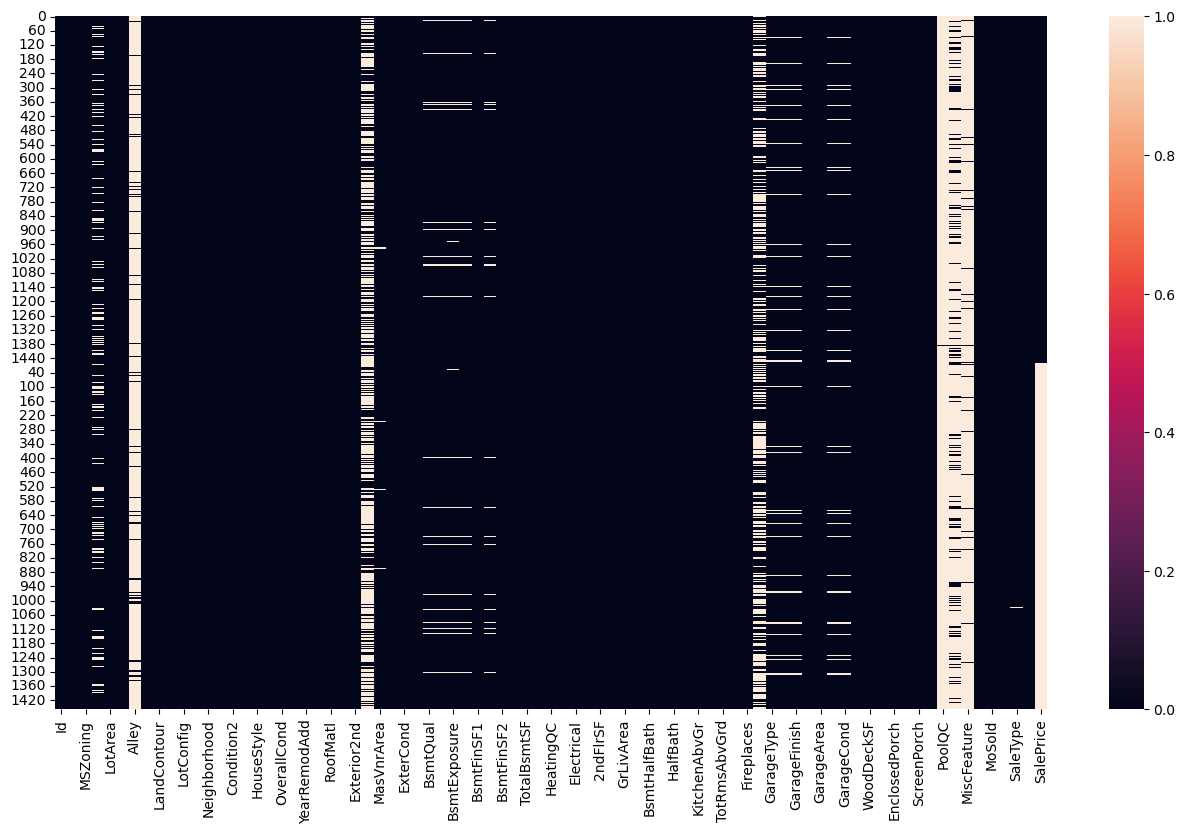

In [19]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig("EDA_img/heatmap_Df_of_null_values.png")

## Get the null value of percentage for Every feature

In [20]:
df = df.set_index(" Id ")

KeyError: "None of [' Id '] are in the columns"

In [21]:
null_count = df.isnull().sum()
null_count

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [22]:
null_percent = df.isnull().sum()
null_percent

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [23]:
null_percent = df.isnull().sum()/df.shape[0] *100
null_percent

Id                0.000000
MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.034258
SaleCondition     0.000000
SalePrice        49.982871
Length: 81, dtype: float64

# drop columns features
#as per my observation , do not drop any feature on dataset

In [24]:
""" as per domain knowwlege we will drop those features , insede none value we will ad constant value NA """
miss_null_50_perc = null_percent[null_percent > 50]
print(miss_null_50_perc) 

Alley          93.216855
MasVnrType     60.500171
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64


In [25]:
df["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [26]:
""" as per domain knowwlege we will drop those fireplaceQU features , insede none value we will ad constant value NA """
miss_null_20_50_perc = null_percent[(null_percent > 20)&(null_percent < 50)]
print(miss_null_20_50_perc) 

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64


In [27]:
miss_null_5_20_perc = null_percent[(null_percent > 5)&(null_percent < 20)]
print(miss_null_5_20_perc)

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64


In [28]:
df["LotFrontage"].value_counts()

LotFrontage
60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
        ... 
152.0      1
138.0      1
182.0      1
168.0      1
133.0      1
Name: count, Length: 128, dtype: int64

<Axes: >

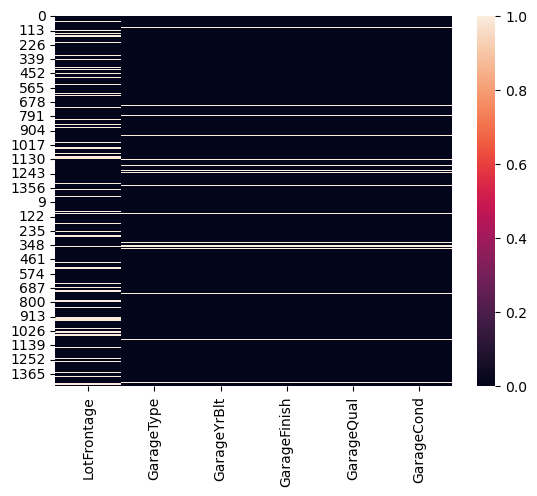

In [29]:
sns.heatmap(df[miss_null_5_20_perc.keys()].isnull())

<Axes: >

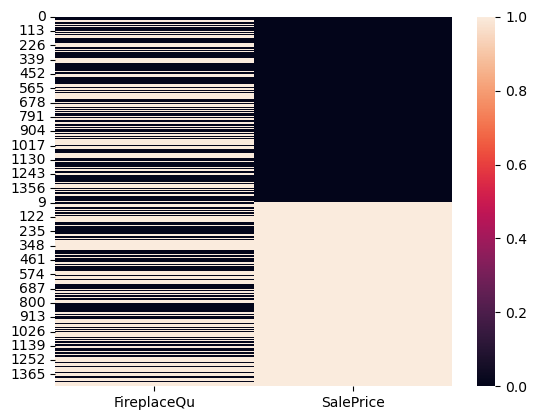

In [30]:
sns.heatmap(df[miss_null_20_50_perc.keys()].isnull())

<Axes: >

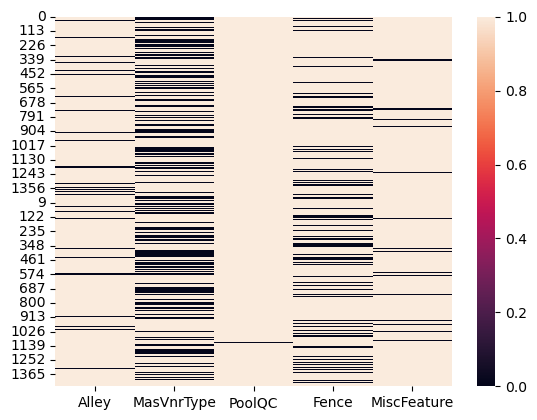

In [31]:
sns.heatmap(df[miss_null_50_perc.keys()].isnull())

In [32]:
missing_value_feat

NameError: name 'missing_value_feat' is not defined

In [ ]:
cat_na_feat = missing_value_feat[missing_value_feat.keys(.isin(cat_features))]
print("Total number of categorical feauter=",len(cat_na_feat))
cat_na_feat

# missing value imputation

In [33]:
missing_value_feat =null_percent[null_percent > 0]
print("Total missing value feature =", len(missing_value_feat))

Total missing value feature = 35


In [34]:
missing_value_feat

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [35]:
cat_na_feat = missing_value_feat[missing_value_feat.keys().isin(cat_features)]
print("Total no of categorical feature = ", len(cat_na_feat))
cat_na_feat

Total no of categorical feature =  23


MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [36]:
float_na_feat = missing_value_feat[missing_value_feat.keys().isin(float_features)]
print("Total no of float feature = ", len(float_na_feat))
float_na_feat

Total no of float feature =  12


LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

In [37]:
int_na_feat = missing_value_feat[missing_value_feat.keys().isin(int_features)]
print("Total no of int feature = ", len(int_na_feat))
int_na_feat

Total no of int feature =  0


Series([], dtype: float64)

# handling MSZoning  = 0.137033

In [38]:
df["MSZoning"].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='MSZoning'>

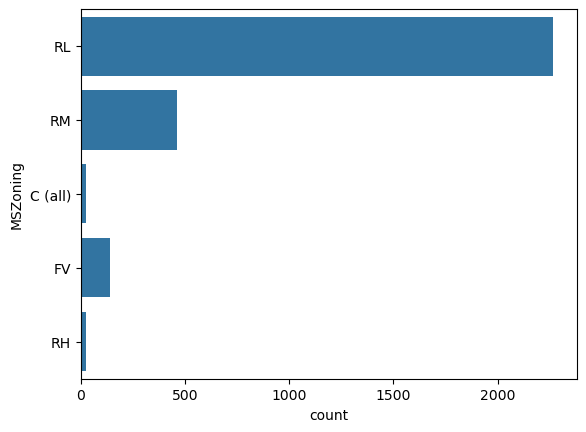

In [39]:
sns.countplot(df["MSZoning"])

In [40]:
### backup of original dataset 
df_mvi = df.copy()
print(df_mvi.shape)  # Corrected: No parentheses after 'shape'


(2919, 81)


In [41]:
df["MSZoning"].mode()[0]

'RL'

In [42]:
mszonning_mode=df["MSZoning"].mode()[0]
df_mvi["MSZoning"].replace(np.nan ,mszonning_mode , inplace=True)
df_mvi["MSZoning"].isnull().sum()

C:\Users\Roshan\AppData\Local\Temp\ipykernel_13500\1422194721.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MSZoning"].replace(np.nan ,mszonning_mode , inplace=True)


0

<Axes: xlabel='count', ylabel='MSZoning'>

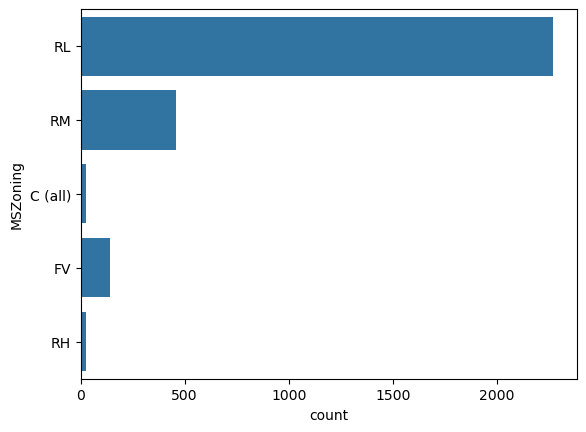

In [43]:
sns.countplot(df_mvi["MSZoning"])

In [44]:
def OldNewCountPlot(df , df_new ,feature):
    plt.subplot(121)
    sns.countplot(df["MSZoning"])
    plt.title("old data distribution")
    plt.subplot(122)
    sns.countplot(df_new["MSZoning"])
    plt.title("new data distribution")
    

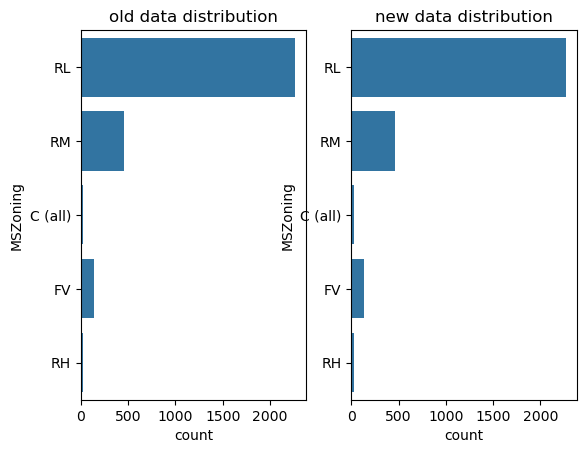

In [45]:
OldNewCountPlot(df , df_mvi ,"MSZoning")

# handling Alley

In [46]:
df["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Alley'>

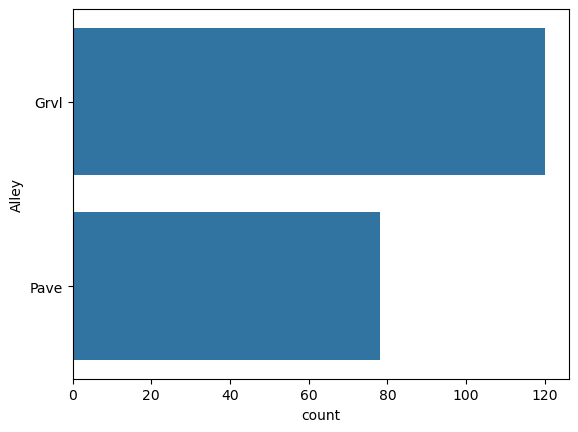

In [47]:
sns.countplot(df["Alley"])

In [48]:
Alley_count ="Na"
df_mvi["Alley"].replace(np.nan ,mszonning_mode , inplace=True)
df_mvi["Alley"].isnull().sum()

C:\Users\Roshan\AppData\Local\Temp\ipykernel_13500\1576500034.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Alley"].replace(np.nan ,mszonning_mode , inplace=True)


0

<Axes: xlabel='count', ylabel='Alley'>

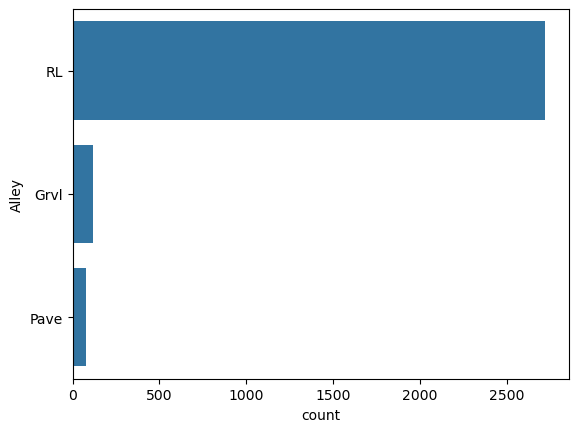

In [49]:
sns.countplot(df_mvi["Alley"])

In [50]:
def OldNewCountPlot(df , df_new ,feature):
    plt.subplot(121)
    sns.countplot(df["Alley"])
    plt.title("old data distribution")
    plt.subplot(122)
    sns.countplot(df_new["Alley"])
    plt.title("new data distribution")

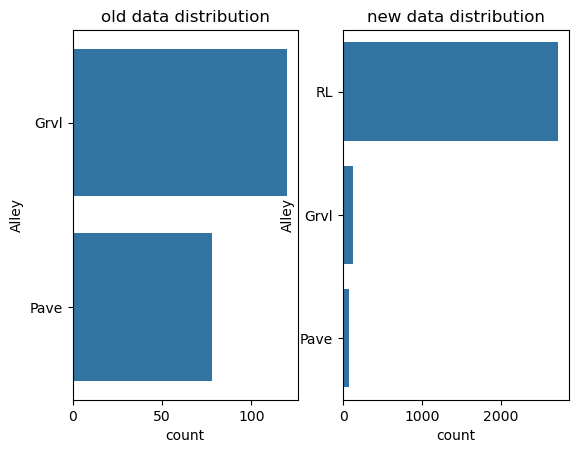

In [51]:
OldNewCountPlot(df , df_mvi ,"Alley")

# handalling LotFrontage

In [52]:
def boxHistPlot(df , figsize=(16, 5)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    sns.boxplot(df)
    plt.subplot(122)
    sns.distplot(df)

C:\Users\Roshan\AppData\Local\Temp\ipykernel_13500\2451955368.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


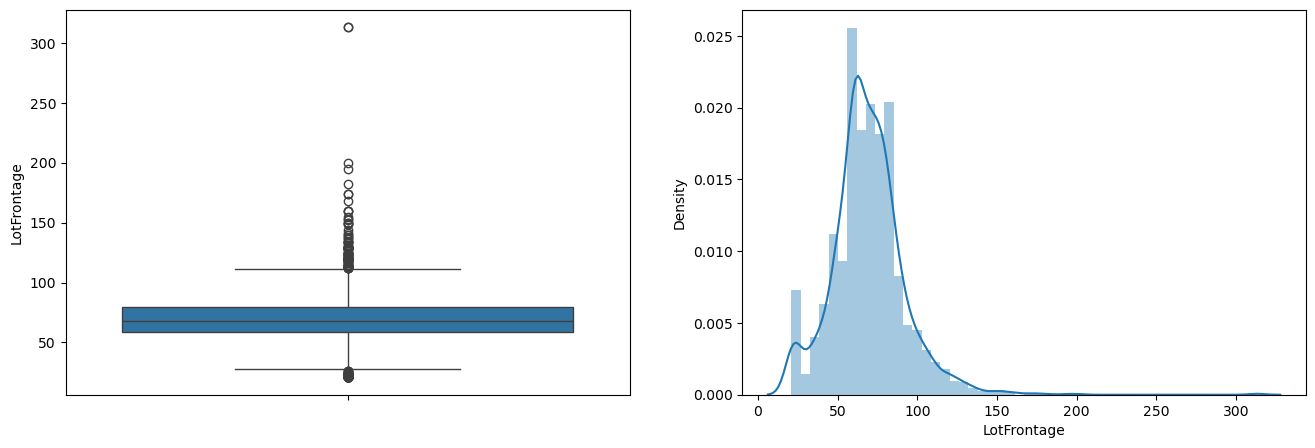

In [53]:
boxHistPlot(df["LotFrontage"])

In [54]:
lotfrontage_mean = df["LotFrontage"].mean()
lotfrontage_mean

69.30579531442663

In [55]:
lotfrontage_mean = df["LotFrontage"].mean()
df_mvi["LotFrontage"].replace(np.nan ,lotfrontage_mean , inplace=True)
df_mvi["LotFrontage"].isnull().sum()

C:\Users\Roshan\AppData\Local\Temp\ipykernel_13500\3360114839.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["LotFrontage"].replace(np.nan ,lotfrontage_mean , inplace=True)


0

In [56]:
def OldNewBoxHistPlot(df , df_new ,feature, figsize=(16,10)):
    plt.figure(figsize=figsize)
    plt.subplot(221)
    sns.boxplot(df[feature])
    plt.title("old data distribution")
    plt.subplot(222)
    sns.distplot(df[feature])
    plt.title("old data distribution")
    plt.subplot(223)
    sns.boxplot(df_new[feature])
    plt.title("new data distribution")
    plt.subplot(224)
    sns.distplot(df_new[feature])
    plt.title("new data distribution")

C:\Users\Roshan\AppData\Local\Temp\ipykernel_13500\1801172669.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])
C:\Users\Roshan\AppData\Local\Temp\ipykernel_13500\1801172669.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[feature])


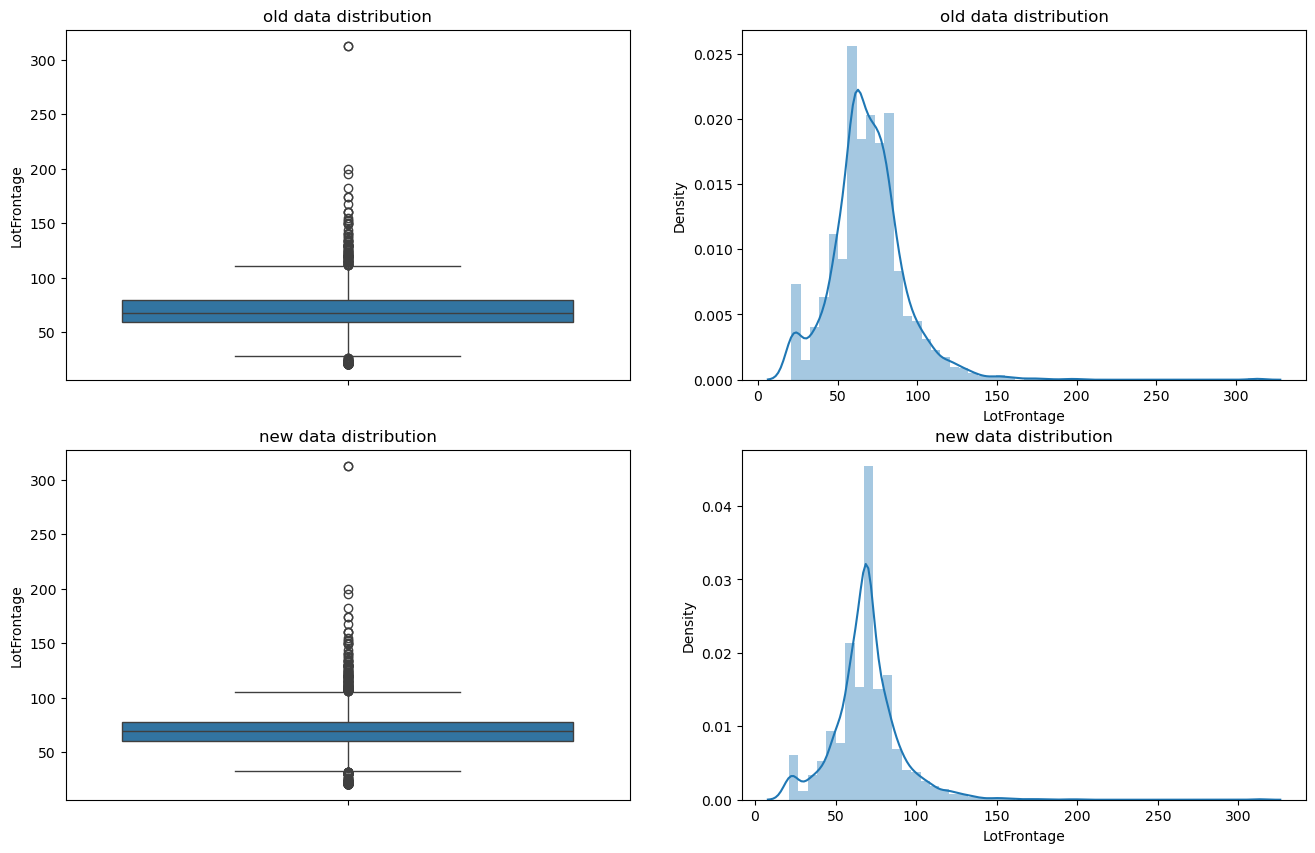

In [57]:
OldNewBoxHistPlot(df ,df_mvi,"LotFrontage")

# handaling Utilities        

In [58]:
df["Utilities"].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [59]:
Utilities_mode=df["Utilities"].mode()[0]
df_mvi["Utilities"].replace(np.nan ,Utilities_mode , inplace=True)
df_mvi["Utilities"].isnull().sum()

C:\Users\Roshan\AppData\Local\Temp\ipykernel_13500\716381827.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Utilities"].replace(np.nan ,Utilities_mode , inplace=True)


0

# handling Exterior1st and Exterior2nd      

In [60]:
df["Exterior1st"].value_counts()

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

In [61]:
df["Exterior2nd"].value_counts()

Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64

In [62]:
Exterior1st_mode=df["Exterior1st"].mode()[0]
Exterior2nd_mode=df["Exterior2nd"].mode()[0]
df_mvi["Exterior1st"].replace(np.nan ,Exterior1st_mode , inplace=True)
df_mvi["Exterior2nd"].replace(np.nan ,Exterior2nd_mode , inplace=True)
print("first is null:",df_mvi["Exterior1st"].isnull().sum())
print("first is null:",df_mvi["Exterior2nd"].isnull().sum())

first is null: 0
first is null: 0


C:\Users\Roshan\AppData\Local\Temp\ipykernel_13500\3223890583.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Exterior1st"].replace(np.nan ,Exterior1st_mode , inplace=True)
C:\Users\Roshan\AppData\Local\Temp\ipykernel_13500\3223890583.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

<Axes: >

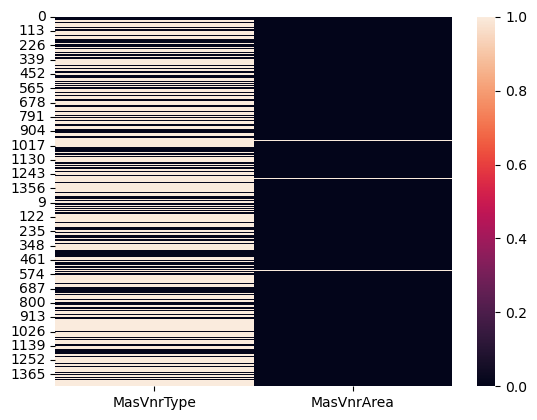

In [63]:
sns.heatmap(df[["MasVnrType","MasVnrArea"]].isnull())

In [64]:
df[df[["MasVnrType","MasVnrArea"]].isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2914,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,NaN
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN


In [65]:
df["MasVnrType"].value_counts()

MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64

In [66]:
MasVnrType_mode=df["MasVnrType"].mode()[0]
df_mvi["MasVnrType"].replace(np.nan ,MasVnrType_mode , inplace=True)
df_mvi["MasVnrType"].isnull().sum()

C:\Users\Roshan\AppData\Local\Temp\ipykernel_13500\3822028636.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MasVnrType"].replace(np.nan ,MasVnrType_mode , inplace=True)


0

C:\Users\Roshan\AppData\Local\Temp\ipykernel_13500\2451955368.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


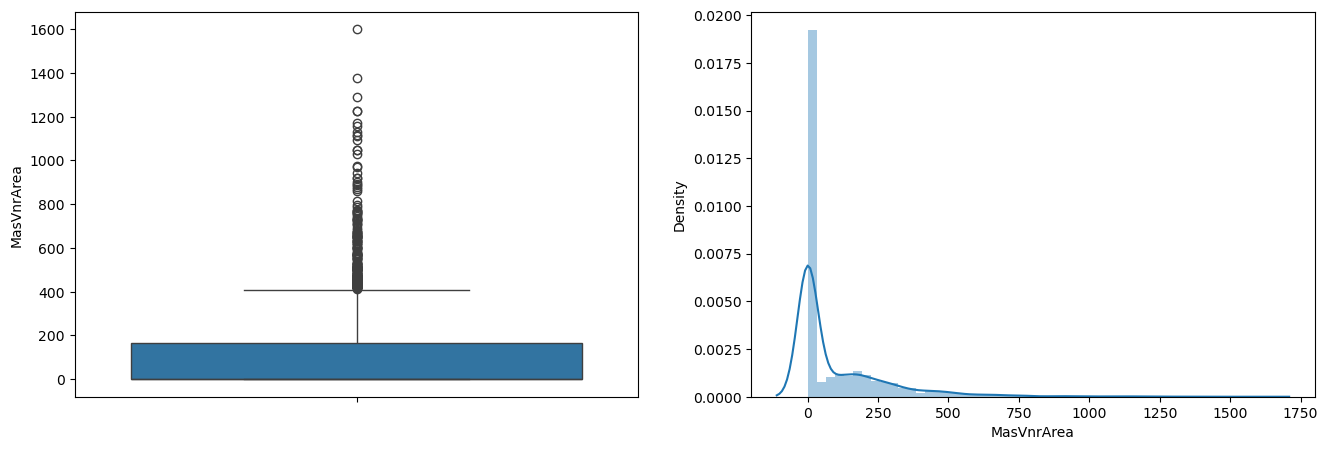

In [67]:
boxHistPlot(df["MasVnrArea"])

# handaling bsmt feature 

In [68]:
cat_bsmt_feat=["BsmtQual",         
"BsmtCond",         
"BsmtExposure",         
"BsmtFinType1",    
"BsmtFinType2"]

num_bstm_feat=["BsmtFinSF1",      
"BsmtFinSF2",       
"BsmtUnfSF",       
"TotalBsmtSF",  
"BsmtFullBath",
"BsmtHalfBath"]


<Axes: >

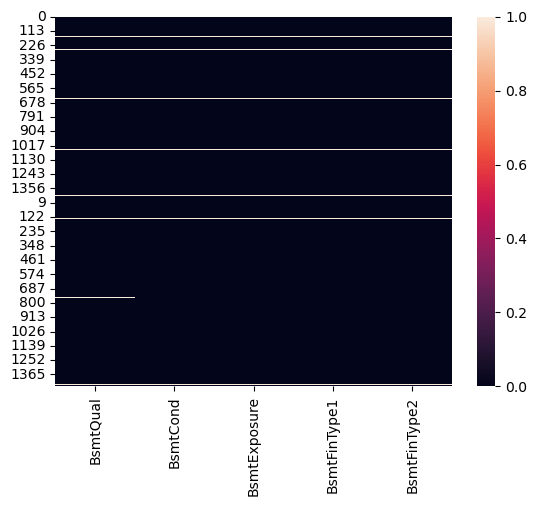

In [69]:
sns.heatmap(df[cat_bsmt_feat].isnull())

<Axes: >

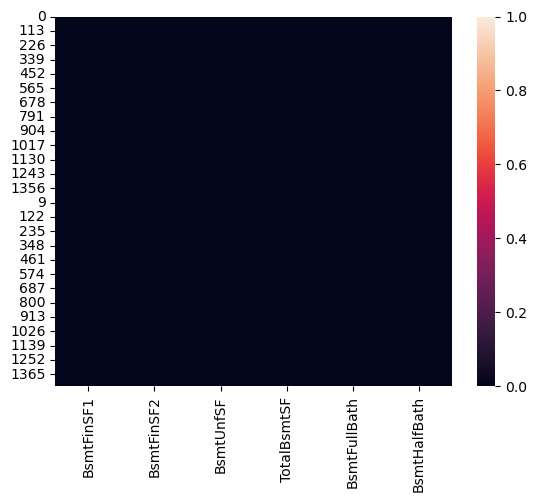

In [70]:
sns.heatmap(df[num_bstm_feat].isnull())

In [71]:
for feat in cat_bsmt_feat:
    print(f"value of the {feat}:{df[feat].value_counts()}")

value of the BsmtQual:BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64
value of the BsmtCond:BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64
value of the BsmtExposure:BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64
value of the BsmtFinType1:BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64
value of the BsmtFinType2:BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64


In [72]:
bsmt_cont="NA"
for feat in cat_bsmt_feat:
    df_mvi[feat].replace(np.nan, bsmt_cont, inplace=True)

C:\Users\Roshan\AppData\Local\Temp\ipykernel_13500\2770634238.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan, bsmt_cont, inplace=True)


In [73]:
df_mvi[cat_bsmt_feat].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

# Feature tranformation 

<Axes: >

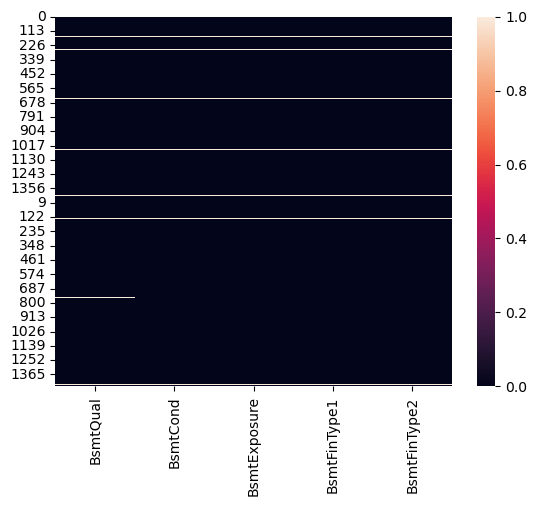

In [74]:
sns.heatmap(df[cat_bsmt_feat].isnull())

In [75]:
df_bsmt =df[cat_bsmt_feat + num_bstm_feat]
df_bsmt[df_bsmt.isnull().any(axis=1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
39,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
90,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
102,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
156,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1343,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1344,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1364,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1431,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
bsmt_num=0
for feat in num_bstm_feat:
    df_mvi[feat].replace(np.nan, bsmt_num, inplace=True)

C:\Users\Roshan\AppData\Local\Temp\ipykernel_13500\2776966225.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan, bsmt_num, inplace=True)


In [77]:
df_mvi[num_bstm_feat].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

# Handaling Electrical and KitchenQual

In [78]:
df["Electrical"].value_counts()

Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

In [79]:
df["KitchenQual"].value_counts()

KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64

In [80]:
df_ekk=df[["Electrical","KitchenQual","KitchenAbvGr"]]
df_ekk[df_ekk.isnull().any(axis=1)]

,Electrical,KitchenQual,KitchenAbvGr
1379,NaN,Gd,1
95,SBrkr,NaN,1


In [81]:
Electrical_mode=df["Electrical"].mode()[0]
df_mvi["Electrical"].replace(np.nan ,Electrical_mode , inplace=True)
df_mvi["Electrical"].isnull().sum()

C:\Users\Roshan\AppData\Local\Temp\ipykernel_13500\2723789469.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Electrical"].replace(np.nan ,Electrical_mode , inplace=True)


0

In [82]:
KitchenQual_mode=df["KitchenQual"].mode()[0]
df_mvi["KitchenQual"].replace(np.nan ,KitchenQual_mode , inplace=True)
df_mvi["KitchenQual"].isnull().sum()

C:\Users\Roshan\AppData\Local\Temp\ipykernel_13500\856991263.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["KitchenQual"].replace(np.nan ,KitchenQual_mode , inplace=True)


0

# handaling cat feature 

In [83]:
Functional       
FireplaceQu     
PoolQC        
Fence          
MiscFeature     
SaleType 

NameError: name 'Functional' is not defined

In [84]:
df["Functional"].value_counts()

Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64

In [85]:
df["SaleType"].value_counts()

SaleType
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64

In [86]:
Functional_mode=df["Functional"].mode()[0]
df_mvi["Functional"].replace(np.nan ,Functional_mode , inplace=True)
df_mvi["Functional"].isnull().sum()

C:\Users\Roshan\AppData\Local\Temp\ipykernel_13500\2551764436.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Functional"].replace(np.nan ,Functional_mode , inplace=True)


0

In [87]:
SaleType_mode=df["SaleType"].mode()[0]
df_mvi["SaleType"].replace(np.nan ,SaleType_mode , inplace=True)
df_mvi["SaleType"].isnull().sum()

C:\Users\Roshan\AppData\Local\Temp\ipykernel_13500\3732459011.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["SaleType"].replace(np.nan ,SaleType_mode , inplace=True)


0

In [88]:
other_cat_feat=["FireplaceQu",     
"PoolQC",        
"Fence",          
"MiscFeature"] 

for feat in other_cat_feat:
    print(f"value of the {feat}:{df[feat].value_counts()}")

value of the FireplaceQu:FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64
value of the PoolQC:PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64
value of the Fence:Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64
value of the MiscFeature:MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64


In [89]:
fireplacequ_cont="NA"
df_mvi["FireplaceQu"].replace(np.nan ,fireplacequ_cont , inplace=True)
df_mvi["FireplaceQu"].isnull().sum()

C:\Users\Roshan\AppData\Local\Temp\ipykernel_13500\1746581337.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["FireplaceQu"].replace(np.nan ,fireplacequ_cont , inplace=True)


0

In [90]:
poolqc_cont="NA"
df_mvi["PoolQC"].replace(np.nan ,poolqc_cont , inplace=True)
df_mvi["PoolQC"].isnull().sum()

C:\Users\Roshan\AppData\Local\Temp\ipykernel_13500\1346071135.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["PoolQC"].replace(np.nan ,poolqc_cont , inplace=True)


0

In [91]:
fence_cont="NA"
df_mvi["Fence"].replace(np.nan ,fence_cont, inplace=True)
df_mvi["Fence"].isnull().sum()

C:\Users\Roshan\AppData\Local\Temp\ipykernel_13500\1880883761.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Fence"].replace(np.nan ,fence_cont, inplace=True)


0

In [92]:
miscfeature_cont="NA"
df_mvi["MiscFeature"].replace(np.nan ,miscfeature_cont, inplace=True)
df_mvi["MiscFeature"].isnull().sum()

C:\Users\Roshan\AppData\Local\Temp\ipykernel_13500\3574838754.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MiscFeature"].replace(np.nan ,miscfeature_cont, inplace=True)


0

# handaling garage feature 

In [93]:
num_garage_feat=["GarageType",       
"GarageFinish",    
"GarageQual",       
"GarageCond"]

cat_garage_feat=["GarageYrBlt",     
"GarageCars",       
"GarageArea"]
df_garafe=df[num_garage_feat+cat_garage_feat]
df_garafe[df_garafe.isnull().any(axis=1)]

,GarageType,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0.0,0.0
48,NaN,NaN,NaN,NaN,NaN,0.0,0.0
78,NaN,NaN,NaN,NaN,NaN,0.0,0.0
88,NaN,NaN,NaN,NaN,NaN,0.0,0.0
89,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...
1433,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1449,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1453,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1454,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [94]:
garage_count="NA"
for feat in cat_garage_feat:
    df_mvi[feat].replace(np.nan ,garage_count  , inplace=True)

df_mvi[cat_garage_feat].isnull().sum()

C:\Users\Roshan\AppData\Local\Temp\ipykernel_13500\686078476.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan ,garage_count, inplace=True)


GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

In [95]:
garage_num=0
for feat in num_garage_feat:
    df_mvi[feat].replace(np.nan ,garage_num, inplace=True)

df_mvi[num_garage_feat].isnull().sum()

C:\Users\Roshan\AppData\Local\Temp\ipykernel_13500\1938463064.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan ,garage_num, inplace=True)


GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [96]:
df_mvi.isnull().any(axis=1).sum()

1467

# convert the numerical feuture to catagirical feature 

In [125]:
for_num_conv = ["MSSubClass","YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]
for feat in for_num_conv:
    print(f"{feat}:data type ={df_mvi[feat].dtype}")

MSSubClass:data type =object
YearBuilt:data type =object
YearRemodAdd:data type =object
GarageYrBlt:data type =object
MoSold:data type =object
YrSold:data type =object


In [126]:
df_mvi[for_num_conv].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,60,2003,2003,2003.0,2,2008
1,20,1976,1976,1976.0,5,2007
2,60,2001,2002,2001.0,9,2008
3,70,1915,1970,1998.0,2,2006
4,60,2000,2000,2000.0,12,2008


In [127]:
df_mvi["MoSold"].unique()

array(['2', '5', '9', '12', '10', '8', '11', '4', '1', '7', '3', '6'],
      dtype=object)

In [128]:
calendar.month_abbr[12]

'Dec'

In [129]:

df_mvi["MoSold"].unique()

array(['2', '5', '9', '12', '10', '8', '11', '4', '1', '7', '3', '6'],
      dtype=object)

In [130]:
for feat in for_num_conv:
     df_mvi[feat]=df_mvi[feat].astype(str) 

In [131]:
for feat in for_num_conv:
    print(f"{feat}:data type ={df_mvi[feat].dtype}")

MSSubClass:data type =object
YearBuilt:data type =object
YearRemodAdd:data type =object
GarageYrBlt:data type =object
MoSold:data type =object
YrSold:data type =object


# convert the numerical feuture to catagirical feature

# Odinal Encoding

In [132]:
ordinal_end_var=["ExterQual",
"ExterCond",
"BsmtQual",
"BsmtCond",
"BsmtExposure",
"BsmtFinType1",
"BsmtFinSF1",
"BsmtFinType2",
"HeatingQC",
"KitchenQual",
"FireplaceQu",
"GarageQual",
"GarageCond",
"Utilities",
"Functional",
"GarageFinish",
"PavedDrive",
"PoolQC"
]
print("total number number of feature to convert ordinal format:",len(ordinal_end_var))

total number number of feature to convert ordinal format: 18


In [133]:
 
df_mvi["ExterQual"].astype(CategoricalDtype(categories=["Po","Fa","Ta","Gd","Ex"],ordered=True)).cat.codes

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
1454   -1
1455   -1
1456   -1
1457   -1
1458   -1
Length: 2919, dtype: int8

In [106]:
df_mvi["ExterQual"].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [134]:
df_mvi["ExterQual"]=df_mvi["ExterQual"].astype(CategoricalDtype(categories=["Po","Fa","Ta","Gd","Ex"],ordered=True)).cat.codes

In [135]:
df_mvi["ExterQual"].value_counts()

ExterQual
-1    2919
Name: count, dtype: int64

In [136]:
df_mvi["BsmtExposure"].value_counts()

BsmtExposure
1    1904
3     418
4     276
2     239
0      82
Name: count, dtype: int64

In [137]:
df_mvi["BsmtExposure"]=df_mvi["BsmtExposure"].astype(CategoricalDtype(categories=["NA","No","Mn","Av","Gd"],ordered=True)).cat.codes

In [138]:
df_mvi["BsmtExposure"].value_counts()

BsmtExposure
-1    2919
Name: count, dtype: int64

In [139]:
df_mvi["ExterCond"].astype(CategoricalDtype(categories=["Po","Fa","Ta","Gd","Ex"],ordered=True)).cat.codes
df_mvi["BsmtQual"].astype(CategoricalDtype(categories=["NA","po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["BsmtCond"].astype(CategoricalDtype(categories=["NA","po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["BsmtFinType1"].astype(CategoricalDtype(categories=["NA","Unf","LwQ","Rec","BLQ","ALQ","GLQ"],ordered=True)).cat.codes
df_mvi["BsmtFinType2"].astype(CategoricalDtype(categories=["NA","Unf","LwQ","Rec","BLQ","ALQ","GLQ"],ordered=True)).cat.codes
df_mvi["HeatingQC"].astype(CategoricalDtype(categories=["Po","Fa","Ta","Gd","Ex"],ordered=True)).cat.codes
df_mvi["KitchenQual"].astype(CategoricalDtype(categories=["Po","Fa","Ta","Gd","Ex"],ordered=True)).cat.codes
df_mvi["FireplaceQu"].astype(CategoricalDtype(categories=["NA","po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["GarageQual"].astype(CategoricalDtype(categories=["NA","po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["GarageCond"].astype(CategoricalDtype(categories=["NA","po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["PoolQC"].astype(CategoricalDtype(categories=["NA","po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["Functional"].astype(CategoricalDtype(categories=["Sal","Sev","Maj2","Maj1","Mod","Min2","Min1","Typ"],ordered=True)).cat.codes
df_mvi["GarageFinish"].astype(CategoricalDtype(categories=["Na","Unf","RFn","Fin"],ordered=True)).cat.codes
df_mvi["PavedDrive"].astype(CategoricalDtype(categories=["N","P","Y"],ordered=True)).cat.codes
df_mvi["Utilities"].astype(CategoricalDtype(categories=["ELO","NASeWa","NASeWr","AllPub"],ordered=True)).cat.codes

0       3
1       3
2       3
3       3
4       3
       ..
1454    3
1455    3
1456    3
1457    3
1458    3
Length: 2919, dtype: int8

In [140]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   object 
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

# one hot encoding to categorical data 

In [154]:
df_encode=df_mvi.copy()
object_feature =df_encode.select_dtypes(include="object").columns.tolist()
print("Total object data type feature: ",len(object_feature))
print("feature : \n",object_feature)

Total object data type feature:  49
feature : 
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [155]:
"""ExterCond,BsmtQual,'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC','KitchenQual', 'Functional', 'FireplaceQu',
'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',"""

"ExterCond,BsmtQual,'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC','KitchenQual', 'Functional', 'FireplaceQu',\n'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',"

In [156]:
df_encode[object_feature].head(2)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,RL,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,NA,NA,NA,2,2008,WD,Normal
1,20,RL,Pave,RL,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,TA,Y,NA,NA,NA,5,2007,WD,Normal


In [157]:
print("The shape of before dataframe encoding: ",df_encode.shape)
df_encode= pd.get_dummies(df_encode, 
                         columns=object_feature, 
                         prefix=object_feature,
                         drop_first= True)
print("The shape of after dataframe encoding: ",df_encode.shape) 

The shape of before dataframe encoding:  (2919, 81)
The shape of after dataframe encoding:  (2919, 1166)


In [158]:
df_encode.head(2)

,Id,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,5,196.0,-1,-1,706.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1,2,80.0,9600,6,8,0.0,-1,-1,978.0,0.0,...,False,False,False,False,True,False,False,False,True,False


In [159]:
df_encode.select_dtypes(include="object").columns.tolist()

[]

# split data tranning and testing

In [161]:
df_encode.shape

(2919, 1166)

In [163]:
len_train = df_train.shape[0]
len_train

1460

In [167]:
x_train = df_encode[:len_train].drop("SalePrice", axis=1)
y_train = df_encode["SalePrice"][:len_train]

x_test = df_encode[:len_train].drop("SalePrice", axis=1)

print("shape of x_train data :",x_train.shape)
print("shape of y_train data :",y_train.shape)
print("shape of x_test data :",x_test.shape)

shape of x_train data : (1460, 1165)
shape of y_train data : (1460,)
shape of x_test data : (1460, 1165)


# Feature Scalling 

In [170]:
sc= StandardScaler()
sc.fit(x_train)
x_train= sc.transform(x_train)
x_test= sc.transform(x_test)


In [171]:
x_train[:3,:]

array([[-1.73086488, -0.22335706, -0.20714171, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-1.7284922 ,  0.45789401, -0.09188637, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-1.72611953, -0.08710685,  0.07347998, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [174]:
x_test[:3,:]

array([[-1.73086488, -0.22335706, -0.20714171, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-1.7284922 ,  0.45789401, -0.09188637, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-1.72611953, -0.08710685,  0.07347998, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [179]:
sc.mean_.shape

(1165,)

In [180]:
sc.with_mean

True

In [182]:
sc.with_std

True

# Train machine learning model

In [187]:
!pip install xgboost

In [211]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from xgboost import XGBRegressor


In [212]:
svr =SVR()
lr = LinearRegression()
sgdr =SGDRegressor()
knr =KNeighborsRegressor()
 
dtr =DecisionTreeRegressor()
gbr =GradientBoostingRegressor()
rfr = RandomForestRegressor()
mlpr =MLPRegressor()
xgbr =XGBRegressor()

In [213]:
models ={"a":["SVR",svr],
       "b":["LinearRegression", lr],
       "c":["SGDRegressor",sgdr],
       "d":["KNeighborsRegressor",knr],
       "e":["DecisionTreeRegressor",dtr],
       "f":["GradientBoostingRegressor",gbr],
       "g":["RandomForestREgressor",rfr],
       "h":["MLPRegressor",mlpr],
       "i":["XGBRegressor",xgbr]
       }

In [214]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model ,x_train=x_train, y_train=x_train):
    cv =KFold(n_splits=7, shuffle=True, random_state=45)
    r2 =make_scorer(r2_score)
    r2_val_score=cross_val_score(model, x_train,y_train,cv=cv, scoring=r2) 
    score=[r2_val_score.mean()]
    return score

In [215]:
models_score = []
for model in models:
    print("Tranning model :",models[model][0])
    score = test_model(models[model][1],x_train, y_train)
    print("Score of model:",score)
    models_score.append([models[model][0],score[0]])

Tranning model : SVR


ValueError: 
All the 7 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Roshan\anaconda.j3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Roshan\anaconda.j3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Roshan\anaconda.j3\Lib\site-packages\sklearn\svm\_base.py", line 190, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Roshan\anaconda.j3\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Roshan\anaconda.j3\Lib\site-packages\sklearn\utils\validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Roshan\anaconda.j3\Lib\site-packages\sklearn\utils\validation.py", line 1049, in check_array
    _assert_all_finite(
  File "C:\Users\Roshan\anaconda.j3\Lib\site-packages\sklearn\utils\validation.py", line 126, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "C:\Users\Roshan\anaconda.j3\Lib\site-packages\sklearn\utils\validation.py", line 175, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
SVR does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
